In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('single_family_home_values.csv') # zillow 
df.head(2) #first two rows
df.shape #returns # of rows and columns
df.info()   #provides column names, count, null values and dtype
df.describe() #stats description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
id                 15000 non-null int64
address            15000 non-null object
city               15000 non-null object
state              15000 non-null object
zipcode            15000 non-null int64
latitude           14985 non-null float64
longitude          14985 non-null float64
bedrooms           15000 non-null int64
bathrooms          15000 non-null float64
rooms              15000 non-null int64
squareFootage      15000 non-null int64
lotSize            15000 non-null int64
yearBuilt          14999 non-null float64
lastSaleDate       15000 non-null object
lastSaleAmount     15000 non-null int64
priorSaleDate      11173 non-null object
priorSaleAmount    11287 non-null float64
estimated_value    15000 non-null int64
dtypes: float64(5), int64(8), object(5)
memory usage: 2.1+ MB


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [4]:
df.dropna(inplace=True) #overwrite df after dropping nas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
id                 11078 non-null int64
address            11078 non-null object
city               11078 non-null object
state              11078 non-null object
zipcode            11078 non-null int64
latitude           11078 non-null float64
longitude          11078 non-null float64
bedrooms           11078 non-null int64
bathrooms          11078 non-null float64
rooms              11078 non-null int64
squareFootage      11078 non-null int64
lotSize            11078 non-null int64
yearBuilt          11078 non-null float64
lastSaleDate       11078 non-null object
lastSaleAmount     11078 non-null int64
priorSaleDate      11078 non-null object
priorSaleAmount    11078 non-null float64
estimated_value    11078 non-null int64
dtypes: float64(5), int64(8), object(5)
memory usage: 1.6+ MB


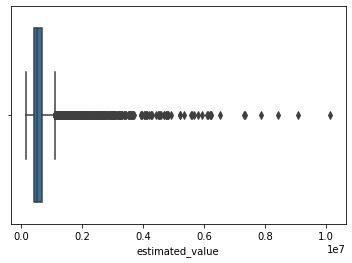

In [6]:
df[['estimated_value', 'yearBuilt', 'priorSaleAmount']].head(2)
sns.boxplot(df.estimated_value) #we can see 3 outliers

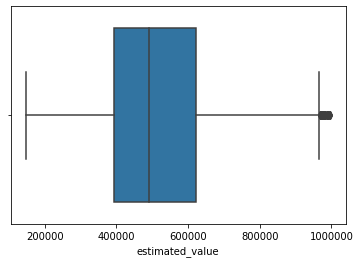

In [8]:
df=df[df.estimated_value<=1000000] #removes values over 1 million (outliers)
sns.boxplot(df.estimated_value) #new plot w/o outliers

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209],
      dtype=int64)

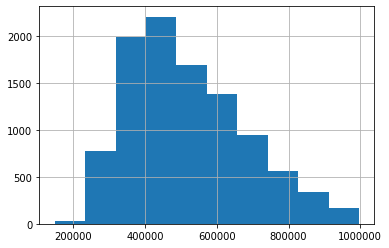

In [9]:
df.estimated_value.hist() #histagram
df.zipcode.unique()#set of unique zipcodes

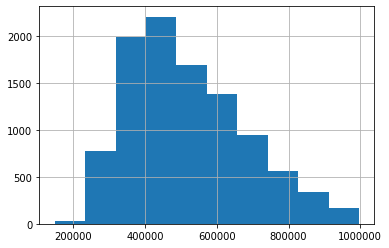

In [10]:
#filter out noise, slice df
df[(df.estimated_value<=1000000)  &  (df.yearBuilt>2013) &  (df.zipcode==80209)] 
df.estimated_value.hist()

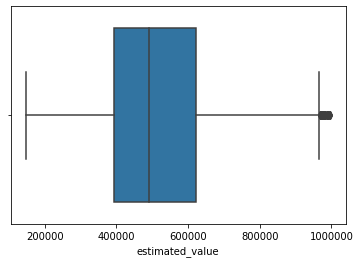

In [11]:
sns.boxplot(df.estimated_value)

C:\Users\clyde\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\clyde\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\clyde\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\clyde\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


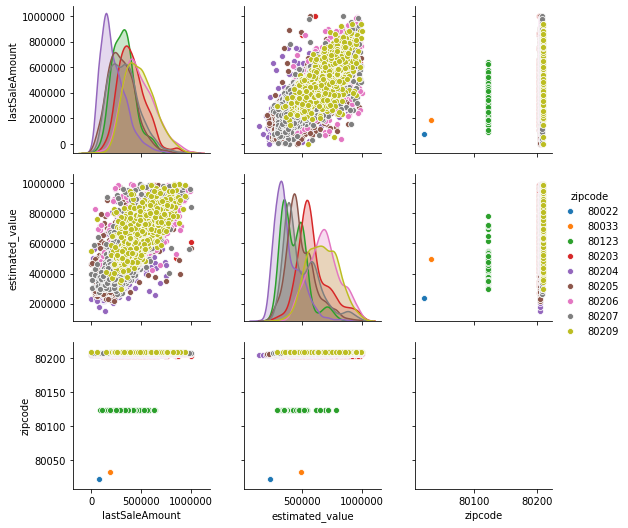

In [12]:
df= df[df.lastSaleAmount<=1000000]
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

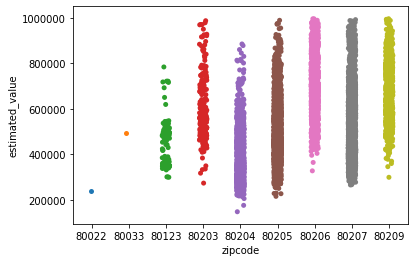

In [13]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

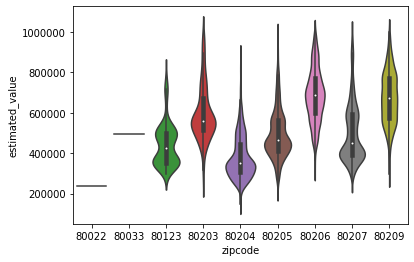

In [14]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [15]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate) 
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate) 
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year
df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year
df['year_between_last_sales']=df.year_lastSaleDate-df.year_priorSaleDate

In [16]:
df.corr().loc[ 'estimated_value' , : ].sort_values(ascending=False) #determine correlation between variables

estimated_value            1.000000
lastSaleAmount             0.771199
squareFootage              0.690419
bathrooms                  0.651712
rooms                      0.582055
priorSaleAmount            0.570242
bedrooms                   0.358081
longitude                  0.234486
id                         0.151873
zipcode                    0.109777
year_between_last_sales    0.088621
year_lastSaleDate          0.040228
weekday_lastSaleDate       0.001672
weekday_priorSaleDate     -0.014823
year_priorSaleDate        -0.059596
lotSize                   -0.074329
latitude                  -0.199264
yearBuilt                 -0.257927
Name: estimated_value, dtype: float64

In [17]:
#Group by 
df2= df.groupby('zipcode').estimated_value.median().reset_index()
df3 = pd.merge(df, df2, on='zipcode', how='left')
df3.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value_x,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,estimated_value_y
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,75000,2004-05-13,165700.0,239753,3,2009,3,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,185000,2008-06-27,0.0,494073,1,2008,4,2008,0,494073.0
